## Packages

In [107]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

## Load Data

In [108]:
data_url = 'fraudTrain.csv'
dataset = pd.read_csv(data_url)

In [109]:
dataset.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [110]:
dataset.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Data Discovery

In [112]:
dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


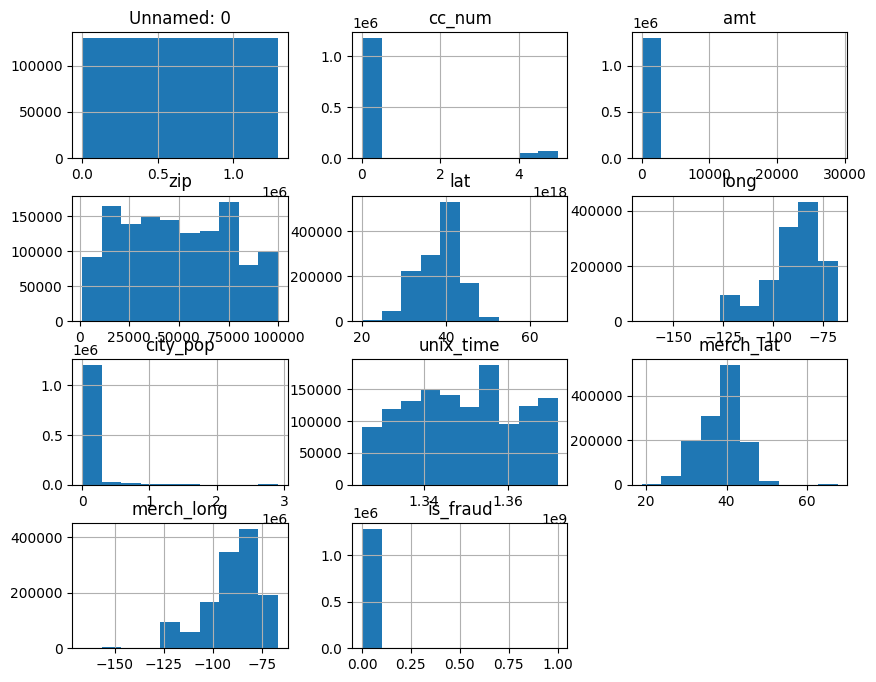

In [113]:
dataset.hist(figsize=(10, 8))
plt.show()

In [114]:
fraud_counts = dataset['is_fraud'].value_counts()
print(fraud_counts)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


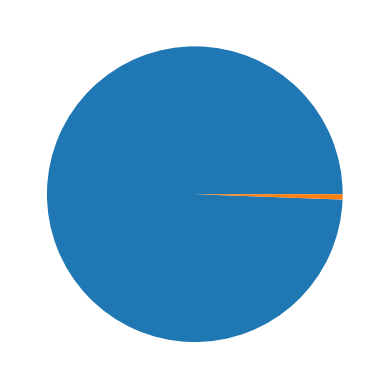

In [115]:
plt.pie(dataset['is_fraud'].value_counts())
plt.show()

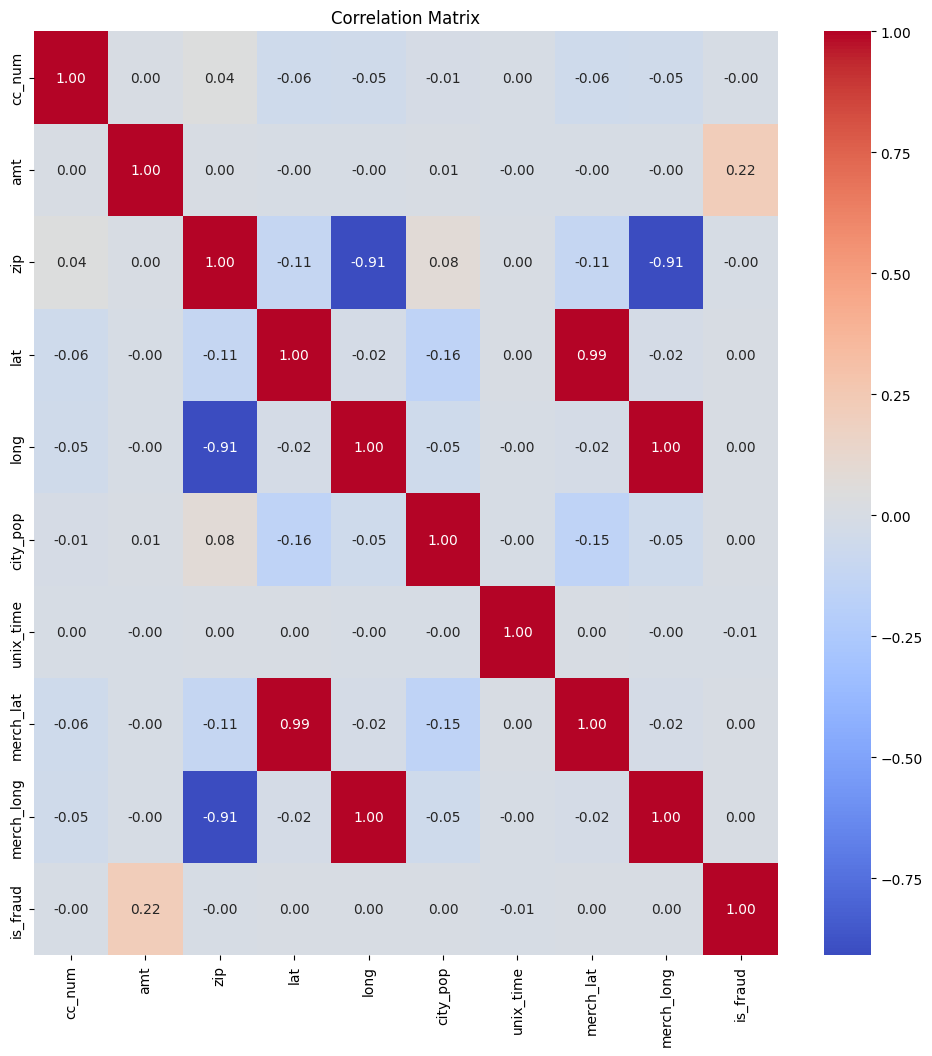

In [116]:
dataset.drop('Unnamed: 0', axis = 1, inplace = True)
num_cols = dataset.select_dtypes(include=['number']).columns
correlation_matrix = dataset[num_cols].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Handle missing values

In [117]:
dataset.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

## Clean noisy data

In [118]:
dataset.drop_duplicates(inplace = True)

In [119]:
unique_counts = dataset.nunique()
print(unique_counts)

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64


### Remove outliers

In [120]:
# Calculate Q1, Q3, and IQR for each column
Q1 = dataset[num_cols].quantile(0.25)
Q3 = dataset[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers as values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_dataset = dataset[~((dataset[num_cols] < lower_bound) | (dataset[num_cols] > upper_bound)).any(axis=1)]
filtered_dataset.reset_index(drop=True, inplace=True)

print(filtered_dataset)

       trans_date_trans_time            cc_num  \
0        2019-01-01 00:00:18  2703186189652095   
1        2019-01-01 00:00:44      630423337322   
2        2019-01-01 00:01:16  3534093764340240   
3        2019-01-01 00:03:06   375534208663984   
4        2019-01-01 00:04:08  4767265376804500   
...                      ...               ...   
879937   2020-06-21 12:11:23   213141712584544   
879938   2020-06-21 12:12:08    30263540414123   
879939   2020-06-21 12:12:19  6011149206456997   
879940   2020-06-21 12:12:32  3514865930894695   
879941   2020-06-21 12:13:36  2720012583106919   

                                   merchant       category     amt  \
0                fraud_Rippin, Kub and Mann       misc_net    4.97   
1           fraud_Heller, Gutmann and Zieme    grocery_pos  107.23   
2        fraud_Kutch, Hermiston and Farrell  gas_transport   45.00   
3                       fraud_Keeling-Crist       misc_pos   41.96   
4          fraud_Stroman, Hudson and Erdman  gas_

## Identify redundant features

In [121]:
cat_col = filtered_dataset.select_dtypes(exclude = ['float64','int64']).columns

In [122]:
label_encoder = LabelEncoder()

for col in cat_col:
    if filtered_dataset[col].dtype == 'object':
        filtered_dataset[col] = label_encoder.fit_transform(filtered_dataset[col])
filtered_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879942 entries, 0 to 879941
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  879942 non-null  int64  
 1   cc_num                 879942 non-null  int64  
 2   merchant               879942 non-null  int64  
 3   category               879942 non-null  int64  
 4   amt                    879942 non-null  float64
 5   first                  879942 non-null  int64  
 6   last                   879942 non-null  int64  
 7   gender                 879942 non-null  int64  
 8   street                 879942 non-null  int64  
 9   city                   879942 non-null  int64  
 10  state                  879942 non-null  int64  
 11  zip                    879942 non-null  int64  
 12  lat                    879942 non-null  float64
 13  long                   879942 non-null  float64
 14  city_pop               879942 non-nu

In [123]:
# y = filtered_dataset['is_fraud']
# X = filtered_dataset.drop('is_fraud' , axis=1)

# model = RandomForestClassifier()
# model.fit(X, y)
# feature_importances = model.feature_importances_
# feature_names = filtered_dataset.drop('is_fraud', axis=1).columns

# sorted_indices = feature_importances.argsort()[::-1]
# sorted_feature_names = feature_names[sorted_indices]
# sorted_feature_importances = feature_importances[sorted_indices]

# plt.barh(sorted_feature_names, sorted_feature_importances)
# plt.xlabel('Feature Importance')
# plt.ylabel('Feature Names')
# plt.title('Sorted Feature Importances')
# plt.show()

# threshold = 0.02

# non_informative_features = sorted_feature_names[sorted_feature_importances < threshold]

# print("Non-Informative Features:", non_informative_features)

In [124]:
non_formative_features = ['street', 'job', 'city', 'cc_num', 'last', 'first', 'lat', 'zip','long', 'state', 'gender']
filtered_dataset.drop(non_formative_features, axis=1, inplace=True)
filtered_dataset.info()

dataset.drop(non_formative_features, axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879942 entries, 0 to 879941
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  879942 non-null  int64  
 1   merchant               879942 non-null  int64  
 2   category               879942 non-null  int64  
 3   amt                    879942 non-null  float64
 4   city_pop               879942 non-null  int64  
 5   dob                    879942 non-null  int64  
 6   trans_num              879942 non-null  int64  
 7   unix_time              879942 non-null  int64  
 8   merch_lat              879942 non-null  float64
 9   merch_long             879942 non-null  float64
 10  is_fraud               879942 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 73.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 11 columns):
 #   Column                 Non-Null

## Normalization

In [125]:
num_cols = filtered_dataset.select_dtypes(include=['int64', 'float64']).columns[:-1] #Don't normalize is_fraud col

filtered_dataset[num_cols] = normalize(filtered_dataset[num_cols], axis=0) 

num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns[:-1] #Don't normalize is_fraud col

dataset[num_cols] = normalize(dataset[num_cols], axis=0) 

## Encoding

In [126]:
category_col = filtered_dataset.select_dtypes(exclude = ['float64','int64']).columns
label_encoder = LabelEncoder()

for col in category_col:
    if filtered_dataset[col].dtype == 'object':
        filtered_dataset[col] = label_encoder.fit_transform(filtered_dataset[col])
        
category_col = dataset.select_dtypes(exclude = ['float64','int64']).columns
label_encoder = LabelEncoder()

for col in category_col:
    if dataset[col].dtype == 'object':
        dataset[col] = label_encoder.fit_transform(dataset[col])

In [127]:
filtered_dataset.to_csv('Data1.csv', index=False) #save to new file

## Undersampling

In [128]:
#Classifying minority and majority
class_counts = dataset['is_fraud'].value_counts()
minority_class_label = class_counts.idxmin()
majority_class_label = class_counts.idxmax()

#Randomly select subset of indices from majority class
majority_indices = dataset[dataset['is_fraud'] == majority_class_label].index
undersampled_indices = dataset[dataset['is_fraud'] == minority_class_label].index.union(
    dataset.sample(n=class_counts[minority_class_label], random_state=42).index)

df_undersampled = dataset.loc[undersampled_indices]

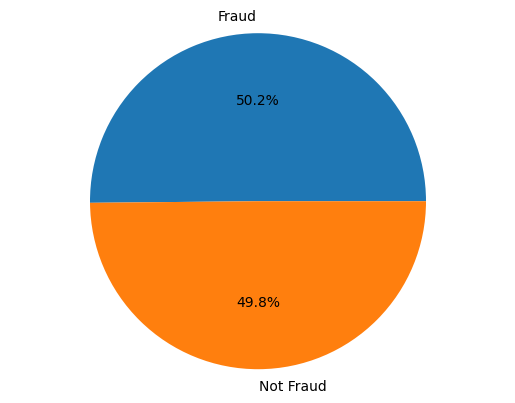

is_fraud
1    7506
0    7460
Name: count, dtype: int64


In [129]:
df_undersampled.to_csv('undersampled_file.csv', index=False)

labels = ['Fraud', 'Not Fraud']

#check if data is balanced
plt.pie(df_undersampled['is_fraud'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

print(df_undersampled['is_fraud'].value_counts())

In [130]:
df_undersampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14966 entries, 472 to 1296235
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14966 non-null  int64  
 1   merchant               14966 non-null  int64  
 2   category               14966 non-null  int64  
 3   amt                    14966 non-null  float64
 4   city_pop               14966 non-null  float64
 5   dob                    14966 non-null  int64  
 6   trans_num              14966 non-null  int64  
 7   unix_time              14966 non-null  float64
 8   merch_lat              14966 non-null  float64
 9   merch_long             14966 non-null  float64
 10  is_fraud               14966 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.4 MB


In [131]:
df_undersampled.tail()

,trans_date_trans_time,merchant,category,amt,city_pop,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1295815,1273939,595,0,0.000995,0.000011,150,695049,0.000893,0.000908,-0.000890,0
1295838,1273962,119,2,0.000261,0.000011,59,431114,0.000893,0.000865,-0.000837,0
1296109,1274233,358,2,0.000186,0.000001,269,790408,0.000893,0.000819,-0.000792,0
1296161,1274284,268,4,0.000224,0.000349,644,1166379,0.000893,0.000917,-0.000712,0
1296235,1274356,664,3,0.000261,0.000007,519,235633,0.000893,0.000924,-0.000704,0
